---

# Train on Static Features

---

### Pitch Histogram
- Serves as an indicator of **vadi**, **samvadi**, and **vivadi** swaras.
- Also indicates whether a particular **svara** is **tivra**, **shuddha**, or **komal**.

### Pitch Slope
- Represents the **mean slope** for each **sruti**.
- Helps identify whether a particular **sruti** is used in the **arohana**, **avarohana**, or both.

In [39]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [30]:
X_srutis = np.load('dataset/srutis.npy')
X_counts = np.load('dataset/counts.npy')
X_slopes = np.load('dataset/slopes.npy')
y = np.load('dataset/labels.npy')
classes = np.load('dataset/mappings.npy')

In [4]:
X = np.concatenate([X_counts, X_slopes], axis=1)

In [5]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 146)
y shape: (36262, 40)


## Train-test split

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [7]:
static_input = keras.layers.Input(shape=(X.shape[1],), name='Static input')

In [9]:
x = keras.layers.Dense(512, activation='relu')(static_input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
output = keras.layers.Dense(y.shape[1], activation='softmax', name='output')(x)

model = keras.models.Model(static_input, outputs=output, name='DeepGRU')

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "DeepGRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Static input (InputLayer)       │ (None, 146)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        75,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,792 (2.21 MB)

 Trainable params: 578,792 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [12]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8423 - loss: 0.5127 - val_accuracy: 0.6674 - val_loss: 1.3365
Epoch 2/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 0.5158 - val_accuracy: 0.6729 - val_loss: 1.3174
Epoch 3/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8428 - loss: 0.5152 - val_accuracy: 0.6760 - val_loss: 1.3473
Epoch 4/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8467 - loss: 0.4981 - val_accuracy: 0.6703 - val_loss: 1.3219
Epoch 5/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8489 - loss: 0.4900 - val_accuracy: 0.6676 - val_loss: 1.3539
Epoch 6/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8498 - loss: 0.4930 - val_accuracy: 0.6753 - val_loss: 1.3303
Epoch 7/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8551 - loss: 0.4827 - val_accuracy: 0.6687 - val_loss: 1.3674
Epoch 8/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8520 - loss: 0.4881 - val_accuracy: 0.

## Test

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 1.3407


In [14]:
print(f'Test accuracy: {round(accuracy, 2) * 100}')

Test accuracy: 67.0


In [25]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.6581792344929789


In [40]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

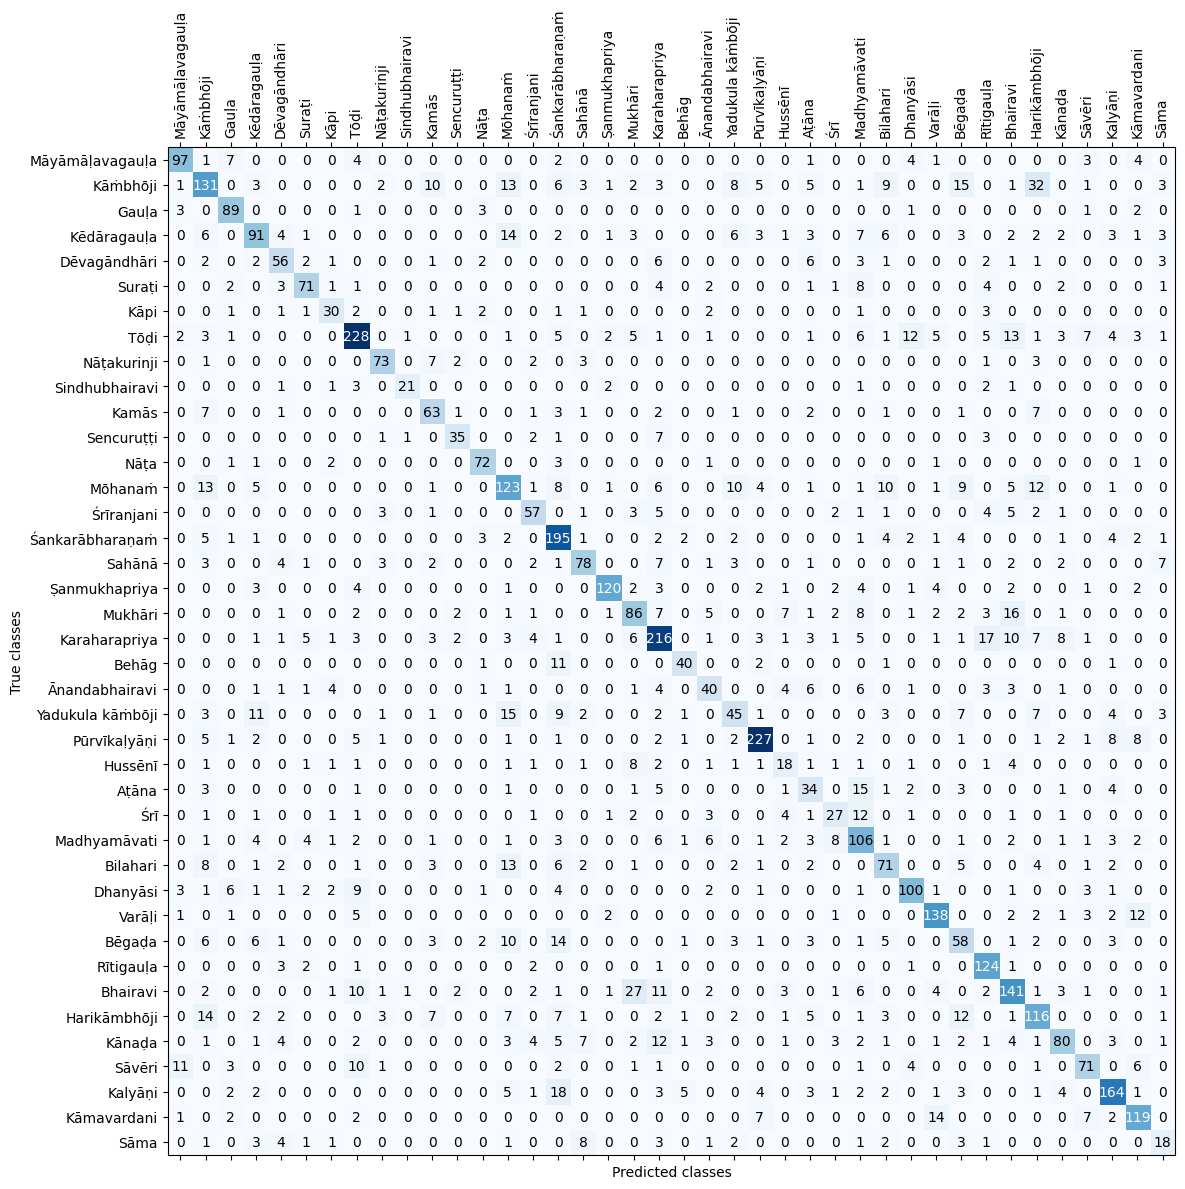

In [52]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('plots/confusion_matrix.png', dpi=300)
plt.tight_layout()
plt.show()

In [16]:
model.save('models/model.keras')